# WeatherPy
----
### Observations: 
* The temperature is higher for those cities that are closer to the equator, which is expected because the equator is the hottest place on earth. Please reference the regression chart. It indicates that there is a corelation between Temperature and Latitude in both the southern and northern hemispheres. 
* As far as the other things go, I don't know how to read a regression scatter plot and no one ever reviews the homework so i'm not sure. Im guessing there is no corelation between latitude and cloudiness, humidity or wind speed because the linear regression line is not exactly linear and data points are scattered.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat= []
lon =[]
temp =[]
cityname = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print(f"Beginning Data Retrieval")
print(f"----------------------------------------")

#set counter
count_city = 0
count_set = 1

for city in cities:
    #Try for error handling
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count_city > 50:
            count_city = 1  
            count_set += 1
            cityname.append(city)
        else:
            count_city += 1
            cityname.append(city)
        print(f"Processing Record {count_city} of Set {count_set} | {city}")    
    
    except:
        print("City not found. Skipping...") 

print("-----------------------------")
print(" "+"Data Retrieval Complete")       
print("-----------------------------")
  

Beginning Data Retrieval
----------------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | nsanje
City not found. Skipping...
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | nurota
City not found. Skipping...
Processing Record 15 of Set 1 | banska bystrica
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | yabassi
Processing Record 20 of Set 1 | gari
Processing Record 21 of Set 1 | datong
Proce

Processing Record 27 of Set 4 | sur
Processing Record 28 of Set 4 | boshnyakovo
Processing Record 29 of Set 4 | colesberg
Processing Record 30 of Set 4 | kodiak
Processing Record 31 of Set 4 | port lincoln
Processing Record 32 of Set 4 | san nicolas
Processing Record 33 of Set 4 | bathsheba
Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | santa cruz de la palma
Processing Record 36 of Set 4 | mapimi
Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | tecoanapa
Processing Record 40 of Set 4 | sambava
Processing Record 41 of Set 4 | batangafo
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | luchow
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | russell
Processing Record 46 of Set 4 | breyten
Processing Record 47 of Set 4 | kalianget
Processing Record 48 of Set 4 | alberdi
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | savannah
P

City not found. Skipping...
Processing Record 15 of Set 8 | golpayegan
Processing Record 16 of Set 8 | mendi
Processing Record 17 of Set 8 | kolondieba
Processing Record 18 of Set 8 | awjilah
Processing Record 19 of Set 8 | karratha
Processing Record 20 of Set 8 | baturite
Processing Record 21 of Set 8 | ambilobe
Processing Record 22 of Set 8 | nome
City not found. Skipping...
Processing Record 23 of Set 8 | jos
City not found. Skipping...
Processing Record 24 of Set 8 | mitsamiouli
Processing Record 25 of Set 8 | baykit
Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | sakaraha
Processing Record 28 of Set 8 | pingliang
Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | the valley
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | moindou
Processing Record 34 of Set 8 | miragoane
Processing Record 35 of Set 8 | nuevo progreso
Processing Record 36 of Set 8 | aykhal
Processing Recor

Processing Record 50 of Set 11 | whitehaven
Processing Record 51 of Set 11 | monrovia
Processing Record 1 of Set 12 | agadez
Processing Record 2 of Set 12 | juegang
Processing Record 3 of Set 12 | lyuban
Processing Record 4 of Set 12 | garden city
Processing Record 5 of Set 12 | shieli
Processing Record 6 of Set 12 | chebsara
City not found. Skipping...
Processing Record 7 of Set 12 | arawa
Processing Record 8 of Set 12 | vieques
Processing Record 9 of Set 12 | parabel
Processing Record 10 of Set 12 | karasjok
Processing Record 11 of Set 12 | standish
Processing Record 12 of Set 12 | maryborough
Processing Record 13 of Set 12 | odweyne
Processing Record 14 of Set 12 | port blair
Processing Record 15 of Set 12 | santa cruz
Processing Record 16 of Set 12 | dauphin
Processing Record 17 of Set 12 | la cumbre
City not found. Skipping...
Processing Record 18 of Set 12 | svetlogorsk
Processing Record 19 of Set 12 | marang
Processing Record 20 of Set 12 | itanagar
Processing Record 21 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert Raw Data to DataFrame
#Export the city data into csv
city_dict = {
    "City": cityname,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lon, 
    "Max Temp": temp,
    "Wind Speed":windSpeed
}
city_dict

{'City': ['port hedland',
  'cape town',
  'mataura',
  'castro',
  'rikitea',
  'airai',
  'qaanaaq',
  'punta arenas',
  'atuona',
  'jamestown',
  'hermanus',
  'nsanje',
  'hilo',
  'nurota',
  'banska bystrica',
  'cidreira',
  'hobart',
  'new norfolk',
  'yabassi',
  'gari',
  'datong',
  'sitka',
  'barranca',
  'rabo de peixe',
  'busselton',
  'yellowknife',
  'camrose',
  'provideniya',
  'norman wells',
  'skovorodino',
  'morondava',
  'port-cartier',
  'ushuaia',
  'deputatskiy',
  'albany',
  'bredasdorp',
  'ferrol',
  'bhimunipatnam',
  'spencer',
  'port alfred',
  'luang prabang',
  'shelburne',
  'leningradskiy',
  'tuatapere',
  'nanortalik',
  'avarua',
  'berlevag',
  'nalut',
  'saint george',
  'bandarbeyla',
  'groningen',
  'moose factory',
  'eugene',
  'touros',
  'hovd',
  'ixtapa',
  'marawi',
  'barrow',
  'flinders',
  'atbasar',
  'kapaa',
  'butaritari',
  'vardo',
  'georgetown',
  'narsaq',
  'grand gaube',
  'magistralnyy',
  'mwinilunga',
  'el do

In [5]:
#Create City data frame from dictionary created
citydata_df = pd.DataFrame.from_dict(city_dict)
citydata_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port hedland,4,AU,1595203167,63,-20.32,118.57,60.80,12.75
1,cape town,75,ZA,1595202973,93,-33.93,18.42,59.00,9.17
2,mataura,92,NZ,1595203167,83,-46.19,168.86,39.00,3.00
3,castro,18,BR,1595203068,91,-24.79,-50.01,57.25,3.80
4,rikitea,45,PF,1595203167,62,-23.12,-134.97,68.68,11.03
...,...,...,...,...,...,...,...,...,...
579,marang,20,MY,1595203231,100,5.21,103.21,77.00,3.36
580,itanagar,100,IN,1595203231,89,27.10,93.62,75.45,5.73
581,kloulklubed,75,PW,1595203231,79,7.04,134.26,84.20,4.70
582,beisfjord,98,NO,1595203232,93,68.38,17.60,48.20,4.70


In [6]:
#Output file to CSv
citydata_df.to_csv("output_data_file")

In [7]:
 citydata_df.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Inspect the data and remove the cities where the humidity > 100%
citydataHumid_df = citydata_df[citydata_df["Humidity"]>100]
citydataHumid_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [9]:
#  Get the indices of cities that have humidity over 100%.
#NONE

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#none

In [11]:
# Extract relevant fields from the data frame
#none
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
#Just a print of the dataframe for reference
citydata_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port hedland,4,AU,1595203167,63,-20.32,118.57,60.80,12.75
1,cape town,75,ZA,1595202973,93,-33.93,18.42,59.00,9.17
2,mataura,92,NZ,1595203167,83,-46.19,168.86,39.00,3.00
3,castro,18,BR,1595203068,91,-24.79,-50.01,57.25,3.80
4,rikitea,45,PF,1595203167,62,-23.12,-134.97,68.68,11.03


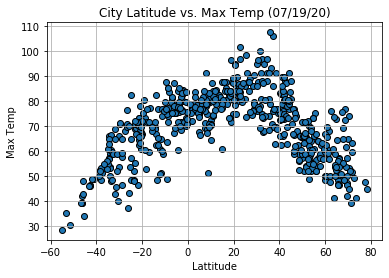

In [14]:
#Scatter Plot for Latitude Vs. Max Temp
lattitude = citydata_df["Lat"]
maxtemp = citydata_df["Max Temp"]
plt.scatter(lattitude,maxtemp, edgecolor = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../LatvsMxTemp.png")
plt.show()


## Latitude vs. Humidity Plot

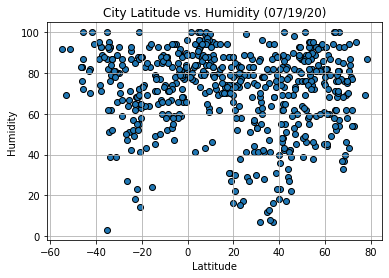

In [15]:
#Scatter Plot for Latitude Vs. Humidity
lattitude = citydata_df["Lat"]
maxtemp = citydata_df["Humidity"]
plt.scatter(lattitude,maxtemp, edgecolor = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../LatvsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

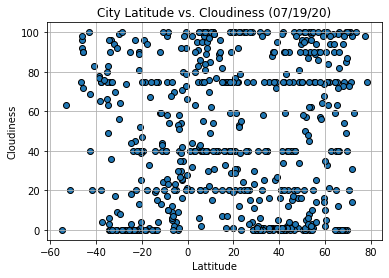

In [16]:
#Scatter Plot for Latitude Vs. Cloudiness
lattitude = citydata_df["Lat"]
maxtemp = citydata_df["Cloudiness"]

plt.scatter(lattitude,maxtemp, edgecolor = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

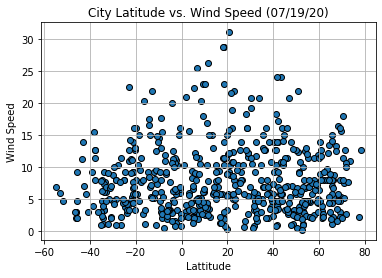

In [17]:
#Scatter Plot for Latitude Vs. Wind Speed
lattitude = citydata_df["Lat"]
maxtemp = citydata_df["Wind Speed"]
plt.scatter(lattitude,maxtemp, edgecolor = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../LatvsWndSpeed.png")
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
def regline(x_values, y_values, ylabel): 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy =(-1,50), xycoords='data', xytext=(0, 0.2), textcoords='axes fraction',fontsize=12,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")


In [19]:
# Create Northern Hemisphere DataFrames
North_df = citydata_df.loc[citydata_df["Lat"]>=0]
North_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
6,qaanaaq,98,GL,1595203167,69,77.48,-69.36,47.7,2.28
9,jamestown,90,US,1595202943,100,42.10,-79.24,73.0,13.87
12,hilo,75,US,1595203168,69,19.73,-155.09,82.4,14.99
13,nurota,0,UZ,1595203168,23,40.56,65.69,77.0,4.70
14,banska bystrica,75,SK,1595203168,93,48.50,19.50,59.0,1.12


In [20]:
## Create Southern Hemisphere DataFrames
South_df = citydata_df.loc[citydata_df["Lat"]<0]
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port hedland,4,AU,1595203167,63,-20.32,118.57,60.80,12.75
1,cape town,75,ZA,1595202973,93,-33.93,18.42,59.00,9.17
2,mataura,92,NZ,1595203167,83,-46.19,168.86,39.00,3.00
3,castro,18,BR,1595203068,91,-24.79,-50.01,57.25,3.80
4,rikitea,45,PF,1595203167,62,-23.12,-134.97,68.68,11.03


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44539858937503607


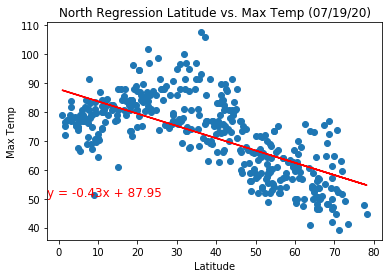

In [21]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]
regline(x_values, y_values, "Max Temp")
plt.title("North Regression Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.savefig("../regNMxTmpLat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6033865718466506


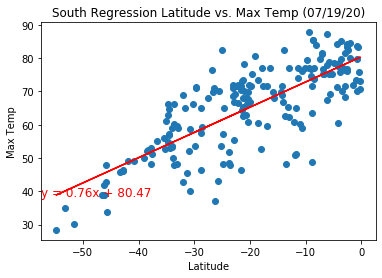

In [22]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = South_df["Lat"]
y_values = South_df["Max Temp"]
regline(x_values, y_values, "Max Temp")
plt.title("South Regression Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.savefig("../regSMxTmpLat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01252747716956479


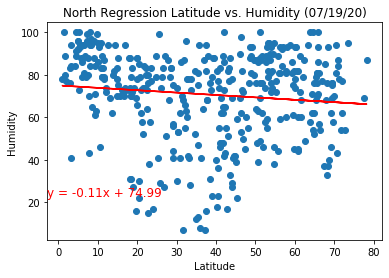

In [23]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = North_df["Lat"]
y_values = North_df["Humidity"]
regline(x_values, y_values, "Humidity")
plt.title("North Regression Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.savefig("../regNHumidLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004568989148180988


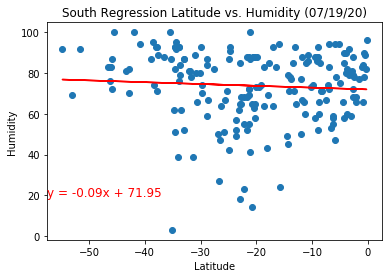

In [24]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
regline(x_values, y_values, "Humidity")
plt.title("South Regression Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.savefig("../regSHumidLat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0012197188278016493


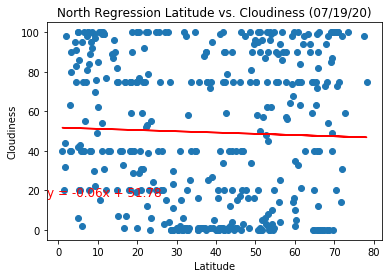

In [25]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]
regline(x_values, y_values, "Cloudiness")
plt.title("North Regression Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("../regNCloudLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016199887945375673


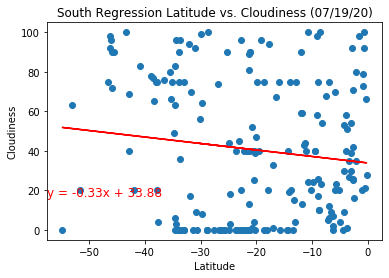

In [26]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]
regline(x_values, y_values, "Cloudiness")
plt.title("South Regression Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("../regSCloudLat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008825851506390914


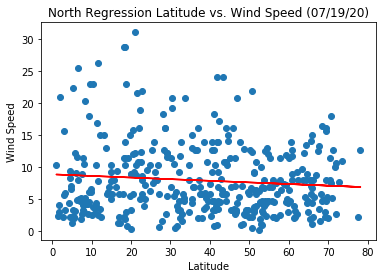

In [27]:
#Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression
x_values = North_df["Lat"]
y_values = North_df["Wind Speed"]
regline(x_values, y_values, "Wind Speed")
plt.title("North Regression Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("../regNWindSpeedLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012400141388346827


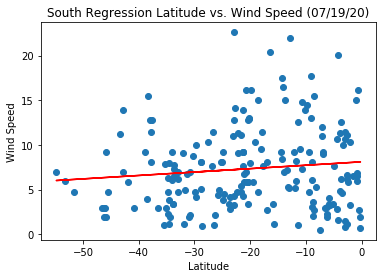

In [28]:
#Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression
x_values = South_df["Lat"]
y_values = South_df["Wind Speed"]
regline(x_values, y_values, "Wind Speed")
plt.title("South Regression Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("../regSWindSpeedLat.png")
plt.show()